# <h1 style='Text-align: center;'>**2. Math Background**</h1>
# <h1 style='Text-align: center;'>Data Science in Engineering</h1>

`Created by: Erick Eduardo Robledo Montes`

---
---

## Libraries

In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt 
from scipy import integrate as odeint
from scipy.stats import norm
from collections import Counter

## 1. Linear and non-linear dynamics

### Functions

In [2]:
def spring_mass_chain(y, t, k1, k2, m1, m2):
    return np.array([
        (k2*y[1]-2*(k1*y[0]))/m1,\
        (k1*y[0]-k2*y[1])/m2
    ])

def seir_model(y, t, N, V,  lambd, mu, alpha, beta, epsilon, gamma):
    return np.array([
        (lambd*mu - V)*y[0] - beta*y[0]*y[2]/N,\
        beta*y[0]*y[2]/N - (mu+epsilon)*y[1],\
        epsilon*y[1] - (lambd+mu+alpha)*y[2],\
        - mu*y[3] + V*y[0],\
        alpha*y[2]
    ])

def rungekutta1(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(0, n-1):
        h = t[i+1] - t[i]
        k1 = f(y[i,:], t[i], *args)
        k2 = f(y[i,:] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i,:] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i,:] + k3 * h, t[i] + h, *args)
        y[i+1,:] = y[i,:] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

### Spring Mass Chain

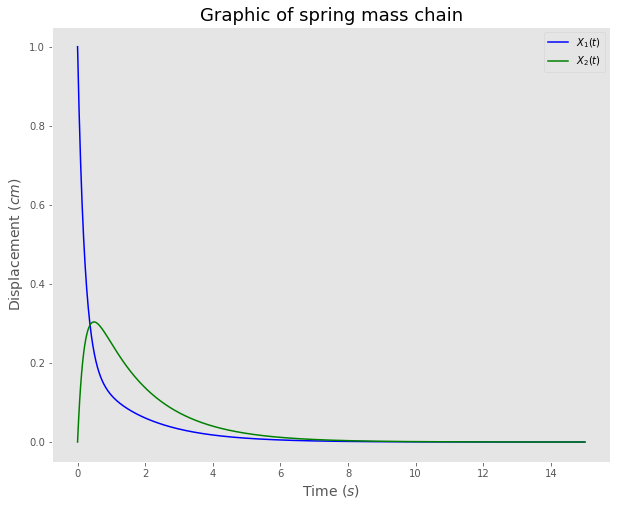

In [91]:
k1,k2,m1,m2 = 20, 15, 10, 10
t = np.linspace(0, 15, 1000)

y0 = [1,0]
f = rungekutta1(spring_mass_chain, y0, t, args=(k1, k2, m1, m2))

plt.style.use('ggplot')
plt.figure(figsize = (10, 8))
plt.plot(t, f[:,0], 'b', label=r'$X_1(t)$')
plt.plot(t, f[:,1], 'g', label=r'$X_2(t)$')
plt.title(r'Graphic of spring mass chain', size=18)
plt.legend(loc='best')
plt.ylabel(r'Displacement $(cm)$', size=14)
plt.xlabel(r'Time $(s)$', size=14)
plt.grid()
plt.show()

### Weather Graph Model

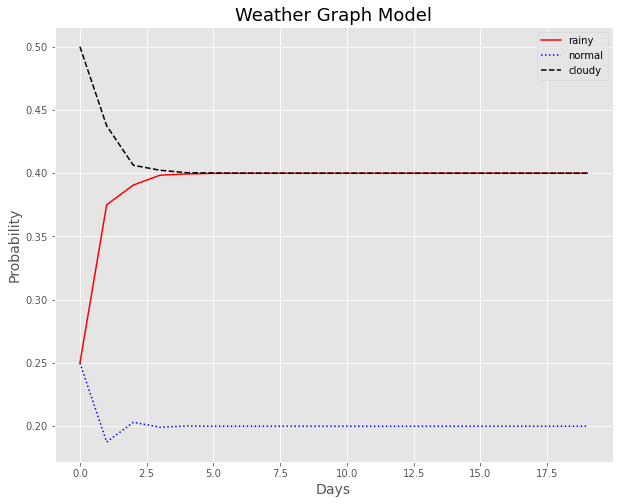

In [58]:
Xhoy = np.array([[0],[0],[1]])
A = np.array([
    [0.5, 0.5, 0.25],
    [0.25, 0, 0.25],
    [0.25, 0.5, 0.5]]
)

days = 20
clima = np.zeros([3, days])
clima[:,0] = Xhoy[:,0]
for k in range(days):
    Xman = A@Xhoy
    clima[:,k] = Xman[:,0]
    Xhoy = Xman

plt.style.use('ggplot')
plt.figure(figsize = (10, 8))
plt.plot(clima[0,:], 'r', label='rainy')
plt.plot(clima[1,:], 'b:', label='normal')
plt.plot(clima[2,:], 'k--', label='cloudy')
plt.title(r'Weather Graph Model', size=18)
plt.ylabel(r'Probability', size=14)
plt.xlabel(r'Days', size=14)
plt.legend()
plt.show()

### Block Diagram of the COVID-19 SEIR Model with Vaccination Control

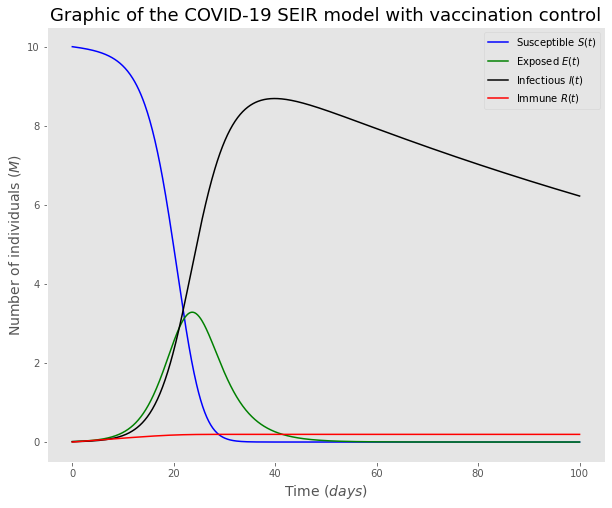

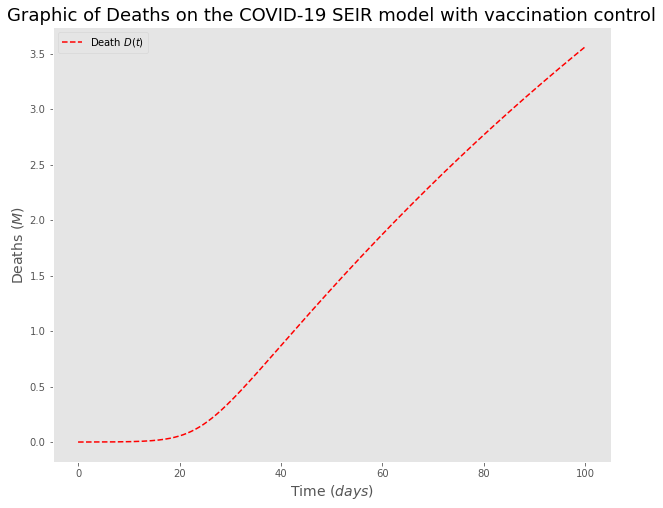

In [59]:
lambd,mu,alpha,beta = 1/30295, 1/30295, 0.006, 0.75
epsilon,gamma,N,V = 0.2, 0.2, 10, 0.001
y0 = np.array([10, 0.01, 0.01, 0, 0])
t = np.linspace(0, 100, 1001)

f = rungekutta1(seir_model, y0, t, args=(N, V,  lambd, mu, alpha, beta, epsilon, gamma))

plt.style.use('ggplot')
plt.figure(figsize = (10, 8))
plt.plot(t, f[:, 0], 'b', label=r'Susceptible $S(t)$')
plt.plot(t, f[:, 1], 'g', label=r'Exposed $E(t)$')
plt.plot(t, f[:, 2], 'k', label=r'Infectious $I(t)$')
plt.plot(t, f[:, 3], 'r', label=r'Immune $R(t)$')
plt.title(r'Graphic of the COVID-19 SEIR model with vaccination control', size=18)
plt.legend(loc='best')
plt.ylabel(r'Number of individuals $(M)$', size=14)
plt.xlabel(r'Time $(days)$', size=14)
plt.grid()
plt.show()

plt.style.use('ggplot')
plt.figure(figsize = (10, 8))
plt.plot(t, f[:, 4], '--r', label=r'Death $D(t)$')
plt.title(r'Graphic of Deaths on the COVID-19 SEIR model with vaccination control', size=18)
plt.legend(loc='best')
plt.ylabel(r'Deaths $(M)$', size=14)
plt.xlabel(r'Time $(days)$', size=14)
plt.grid()
plt.show()

## 2. Probability and statistics

### Functions

In [40]:
def roll_dice(n_dice : int, n_times : int, sides=6):
    return np.random.randint(1, sides+1, size=(n_times, n_dice))

def pmf(values, normed=False):
    counts = Counter(values.flatten())
    output = np.array(sorted(counts.items(), key=lambda x: x[0]), dtype='float')
    
    if normed:
        norm = output.T[1].sum()
        output.T[1] = output.T[1]/norm
    
    return output

def markov_chain(days : int, init_state : str, transition : list, Matrix : list):
    initialState = init_state
    activityList = [initialState]
    i = 0
    prob = 1
    while i != days:
        if initialState == "T1":
            change = np.random.choice(transition[0],replace=True,p=Matrix[0])
            if change == "T1T1":
                prob = prob * 0.2
                activityList.append("T1")
                pass
            elif change == "T1T3":
                prob = prob * 0.2
                initialState = "T3"
                activityList.append("T3")
            else:
                prob = prob * 0.6
                initialState = "T2"
                activityList.append("T2")
        elif initialState == "T3":
            change = np.random.choice(transition[1],replace=True,p=Matrix[1])
            if change == "T3T3":
                prob = prob * 0.2
                activityList.append("T3")
                pass
            elif change == "T3T1":
                prob = prob * 0.1
                initialState = "T1"
                activityList.append("T1")
            else:
                prob = prob * 0.7
                initialState = "T2"
                activityList.append("T2")
        elif initialState == "T2":
            change = np.random.choice(transition[2],replace=True,p=Matrix[2])
            if change == "T2T2":
                prob = prob * 0.1
                activityList.append("T2")
                pass
            elif change == "T2T1":
                prob = prob * 0.3
                initialState = "T1"
                activityList.append("T1")
            else:
                prob = prob * 0.6
                initialState = "T3"
                activityList.append("T3")
        i += 1  
    return activityList

### Roll 2 dices 100,000 times and get its corresponding histogram

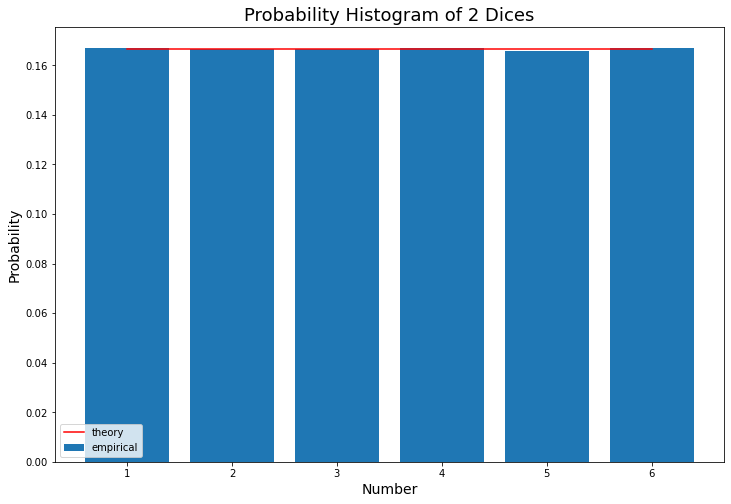

In [41]:
values = roll_dice(2, 100000)
dist = pmf(values, normed=True)

plt.figure(figsize=(12,8))
plt.bar(dist.T[0], dist.T[1], label='empirical')
plt.plot([1, 6], [1/6., 1/6.], 'r-', label='theory')
plt.title(r'Probability Histogram of 2 Dices', size=18)
plt.ylabel(r'Probability', size=14)
plt.xlabel(r'Number', size=14)
plt.legend()
plt.show()

### Gaussian distributions $p$ with the parameters $(μ, σ) = (0, 1), (4, 2), (−4, 1/2)$

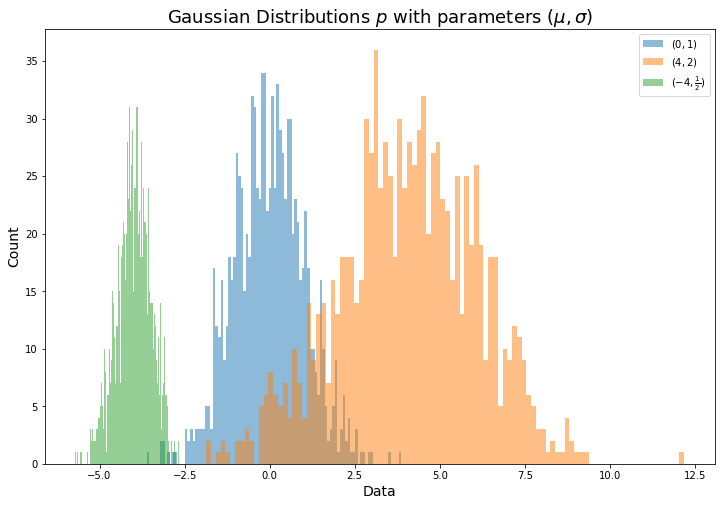

In [42]:
generated_1 = norm.rvs(0, 1, size=1000)
generated_2 = norm.rvs(4, 2, size=1000)
generated_3 = norm.rvs(-4, 1/2, size=1000)

plt.figure(figsize=(12,8))
plt.hist(generated_1, alpha = 0.5, bins=100, label=r"$(0,1)$")
plt.hist(generated_2, alpha = 0.5, bins=100, label=r"$(4,2)$")
plt.hist(generated_3, alpha = 0.5, bins=100, label=r"$(-4,\frac{1}{2})$")
plt.xlabel(r"Data", size=14)
plt.ylabel(r"Count", size=14)
plt.title(r"Gaussian Distributions $p$ with parameters $(μ, σ)$", size=18)
plt.legend(loc='upper right')
plt.show()

### Markov Chain

In [43]:
states = ["T1","T2","T3"]
transitionName = [
    ["T1T1","T1T3","T1T2"],
    ["T3T1","T3T3","T3T2"],
    ["T2T1","T2T3","T2T2"]
    ]
transitionMatrix = [
    [0.2,0.2,0.6],
    [0.2,0.1,0.7],
    [0.1,0.3,0.6]
    ]
    
list_activity = []
count = 0

for iterations in range(1,10000):
    list_activity.append(markov_chain(4, "T2", transitionName, transitionMatrix))

for smaller_list in list_activity:
    if(smaller_list[1] == "T2"):
        count += 1

percentage = (count/10000) * 100
print("The probability of starting at state:'T2' and ending at state:'T2'= " + str(percentage) + "%")

The probability of starting at state:'T2' and ending at state:'T2'= 61.31999999999999%


## 3. Stochastic differential equations (SDEs)

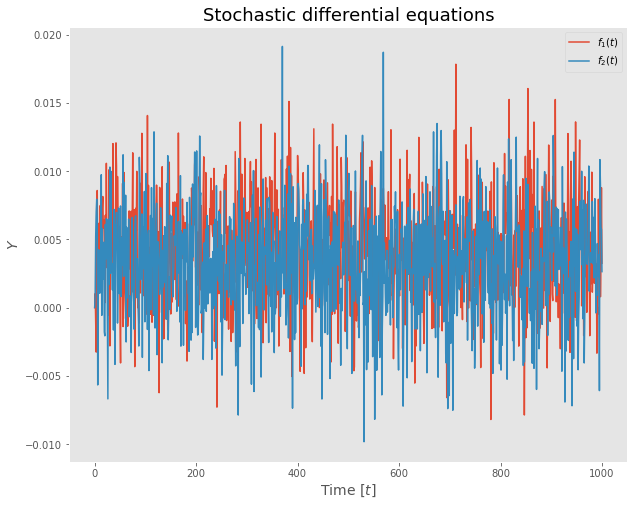

In [16]:
class Model:
    """
    Stochastic model constants.
    """
    THETA = 0.7
    MU    = 1.5
    SIGMA = 0.06
    GAMMA = 0.2

def mu(y: float, _t: float) -> float:
    """
    Implement the Ornstein–Uhlenbeck mu.
    """
    return Model.THETA * (Model.MU - y)

def sigma(_y: float, _t: float) -> float:
    """
    Implement the Ornstein–Uhlenbeck sigma.
    """
    return Model.SIGMA

def gamma(_y: float, _t: float) -> float:
    """
    Implement the Ornstein–Uhlenbeck sigma.
    """
    return Model.GAMMA

def dW(delta_t: float) -> float:
    """
    Sample a random number at each call.
    """
    return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))

def run_simulation():
    """
    Return the result of one full simulation.
    """
    T_INIT = 3
    T_END  = 7
    N      = 1000  # Compute 1000 grid points
    DT     = float(T_END - T_INIT) / N
    TS = np.arange(T_INIT, T_END + DT, DT)

    Y_INIT = 0

    ys_1 = np.zeros(N + 1)
    ys_2 = np.zeros(N + 1)
    ys_1[0] = Y_INIT
    ys_2[0] = Y_INIT
    for i in range(1, TS.size):
        t = T_INIT + (i - 1) * DT
        y = ys_1[i - 1]
        ys_1[i] = -gamma(y, t)*(y*y*y) + mu(y, t) * DT + sigma(y, t) * dW(DT)
        ys_2[i] = -gamma(y, t)*(y) + mu(y, t) * DT + sigma(y, t) * dW(DT)

    return TS, ys_1, ys_2

def plot_simulations(num_sims: int) -> None:
    """
    Plot several simulations in one image.
    """
    for _ in range(num_sims):
        plt.style.use('ggplot')
        plt.figure(figsize = (10, 8))
        plt.plot(run_simulation()[1], label=r'$f_1(t)$')
        plt.plot(run_simulation()[2], label=r'$f_2(t)$')

    plt.title(r'Stochastic differential equations', size=18)
    plt.xlabel(r"Time $[t]$", size=14)
    plt.ylabel(r"$Y$", size=14)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

NUM_SIMS = 1
plot_simulations(NUM_SIMS)
